<a href="https://colab.research.google.com/github/hedshefer/DS-Hotels/blob/main/DS_Hotel_Review_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install geopandas
# !pip install mpl_toolkits

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library
import sklearn

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score

from datetime import datetime

#NLP Libraries:
import nltk
import spacy
import gensim

#Our standards:
from tqdm import tqdm
%matplotlib inline
sns.set("talk")
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Loading the data

In [ ]:
! pip install kaggle
import json
import zipfile
import os
from google.colab import drive
drive.mount('/content/drive')

# train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS-hotels/7282_1.csv')
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS-hotels/Datafiniti_Hotel_Reviews.csv')
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(train_data, 
                      test_size=0.25)
# train_data = pd.read_csv('sample_data/Datafiniti_Hotel_Reviews.csv',  delimiter=None, 
#                 header='infer', names=None, 
#                 index_col=None,delim_whitespace=True,usecols=None, squeeze=False, engine=None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
train_data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
8141,AV23rYbbIxWefVJwjO4a,2016-03-23T04:22:28Z,2018-01-28T10:35:00Z,3000 Marina Dr,"Hotel,Hotels,Hotels Motels",Accommodation & Food Services,Moses Lake,US,us/wa/moseslake/3000marinadr/387493762,47.103200,-119.317600,Best Western Plus Lake Front Hotel,98837,WA,2016-03-10T00:00:00Z,"2016-05-13T00:00:00Z,2016-07-29T00:00:00Z,2016...",4.0,https://www.tripadvisor.com/Hotel_Review-g5862...,Old hotel getting updates. The best part is th...,Great Real Estate,NaN,NaN,gcircle94,https://foursquare.com/v/best-western-plus-lak...,https://www.bestwestern.com/en_US/book/hotel-r...
6260,AVwd--7e_7pvs4fz_AdQ,2016-11-03T00:49:27Z,2018-03-09T18:38:15Z,811 Clover Rd,"Hotel,Hotels Motels,Hotels",Accommodation & Food Services,Tracy,US,us/ca/tracy/811cloverrd/1919156878,37.761900,-121.437700,Best Western Luxury Inn,95376,CA,2015-09-21T00:00:00Z,"2016-08-05T00:00:00Z,2016-07-31T00:00:00Z,2016...",2.0,https://www.hotels.com/hotel/175240/reviews%20/,The woman who checked us in upon our arrival w...,Dirty bathroom and rude staff,NaN,NaN,Kaela,https://foursquare.com/v/best-western-luxury-i...,https://www.bestwestern.com/en_US/book/hotel-r...
2254,AVwdMsswkufWRAb53Vy0,2017-04-10T07:43:42Z,2018-06-29T19:35:18Z,3730 Las Vegas Blvd S,"Hotels,Casinos,Resorts,Resort,Casino,Hotel",Accommodation & Food Services,Las Vegas,US,us/nv/lasvegas/3730lasvegasblvds/-1699935985,36.107741,-115.176268,ARIA Resort Casino,89158,NV,2016-04-26T00:00:00Z,"2016-07-12T00:00:00Z,2016-11-05T00:00:00Z,2016...",5.0,https://www.tripadvisor.com/Hotel_Review-g4596...,This hotel was amazing and I couldn't stay any...,Must stay! Wish I didn't have to leave!,Texas,NaN,LIm1M,https://www.tripadvisor.com/Hotel_Review-g4596...,http://www.arialasvegas.com
5937,AVweK9V3kufWRAb5AnT-,2017-02-21T18:00:34Z,2018-03-14T18:24:02Z,8201 Preston Rd,"Hotel,Cocktail Bar,Lounge,Hotels,Hotels Motels...",Accommodation & Food Services,Plano,US,us/tx/plano/8201prestonrd/1971414100,33.088780,-96.806270,NYLO Plano at Legacy,75024,TX,2016-04-04T00:00:00Z,"2016-08-04T00:00:00Z,2016-07-14T00:00:00Z",5.0,https://www.tripadvisor.com/Hotel_Review-g5646...,One hot Sunday in August our AC broke and the ...,Oasis to the Plano Heat,Dallas,TX,Allison L,https://foursquare.com/v/nylo-plano-at-legacy/...,http://www.nylohotels.com/plano
8325,AVwci_qUIN2L1WUfmKNQ,2015-10-23T02:31:14Z,2018-01-28T08:08:30Z,110 Heritage Dr,"Hotels,Lodging,Corporate Lodging,Hotel",Accommodation & Food Services,Oxford,US,us/ms/oxford/110heritagedr/-514507675,34.364660,-89.557580,Hampton Inn Oxford-West,38655,MS,2016-04-14T00:00:00Z,2016-05-10T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4393...,The location is great for shopping resturants....,Business trip,Alexandria,LA,U971KBcindyb,https://www.yellowpages.com/oxford-ms/mip/hamp...,https://ad.doubleclick.net/ddm/clk/317271033;1...


In [ ]:
train_data.shape

(7500, 25)

In [ ]:
len(train_data),len(test_data)

(7500, 2500)

In [ ]:
train_data.dtypes

id                       object
dateAdded                object
dateUpdated              object
address                  object
categories               object
primaryCategories        object
city                     object
country                  object
keys                     object
latitude                float64
longitude               float64
name                     object
postalCode               object
province                 object
reviews.date             object
reviews.dateSeen         object
reviews.rating          float64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.userProvince     object
reviews.username         object
sourceURLs               object
websites                 object
dtype: object

Comparative Visualizations Using Seaborn¶

In [ ]:
train_data['reviews.rating'] = train_data['reviews.rating'].values.astype(np.int64)
test_data['reviews.rating'] = test_data['reviews.rating'].values.astype(np.int64)

train_data['reviews.text'] = train_data['reviews.text'].astype(str)
train_data['reviews.title'] = train_data['reviews.title'].astype(str)

test_data['reviews.text'] = test_data['reviews.text'].astype(str)
test_data['reviews.title'] = test_data['reviews.title'].astype(str)

In [ ]:
categorical_variables = ['city', 'province', 'reviews.userCity', 'reviews.userProvince']

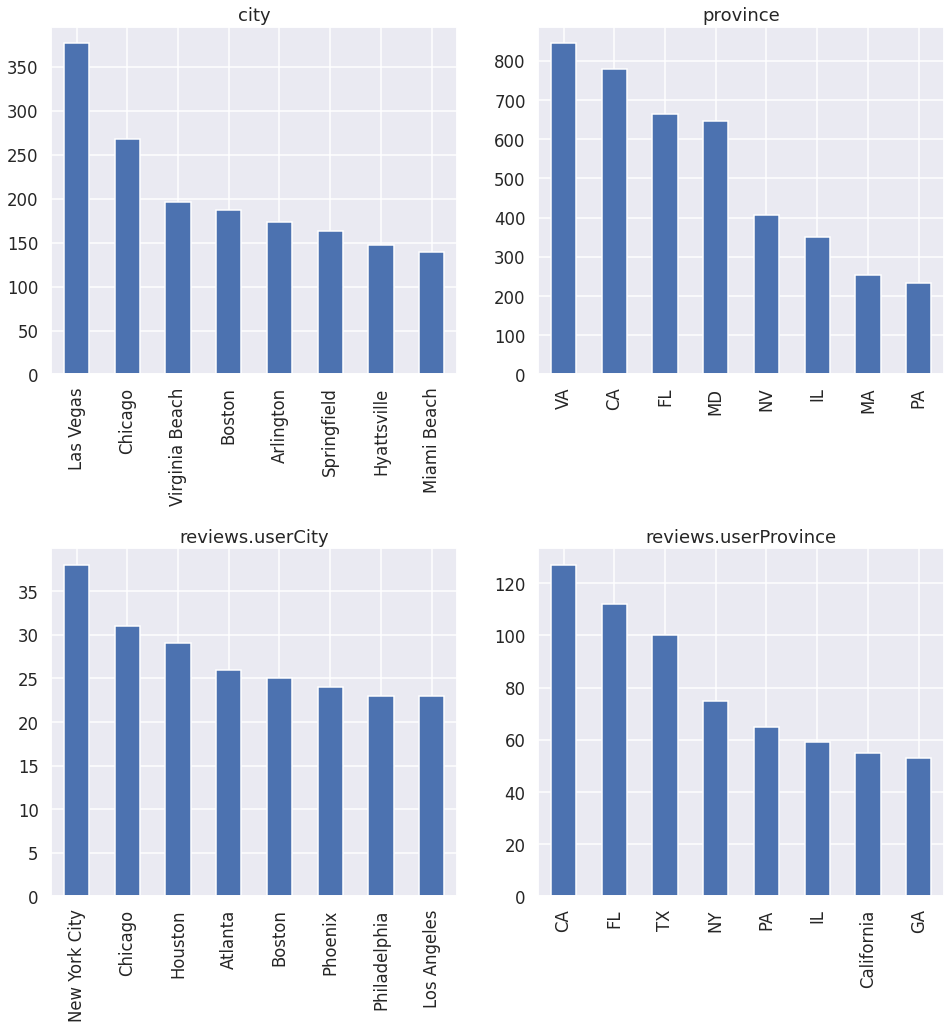

In [ ]:
#generate a figures grid:
fig, axes = plt.subplots(2,2,figsize=(16,16))
fig.subplots_adjust(hspace=0.5)

#we will create a histogram for each categorical attribute
n=len(categorical_variables)
num_rows = 2
max_bars = 8

for i,variable in enumerate(categorical_variables):
    #calculate the current place on the grid
    r=int(i/num_rows)
    c=i%num_rows
    
    #create the "value counts" for the first <max_bars> categories:
    u=min(train_data[variable].nunique(),max_bars)
    vc = train_data[variable].value_counts()[:u]
    
    # plot a bar chart using Pandas
    vc.plot(kind='bar',ax=axes[r,c],title=variable)

In [ ]:
train_data['month'] = pd.DatetimeIndex(train_data['reviews.date']).month
test_data['month'] = pd.DatetimeIndex(test_data['reviews.date']).month

Text(0.5, 1.0, 'Most 10 Hotels Visted')

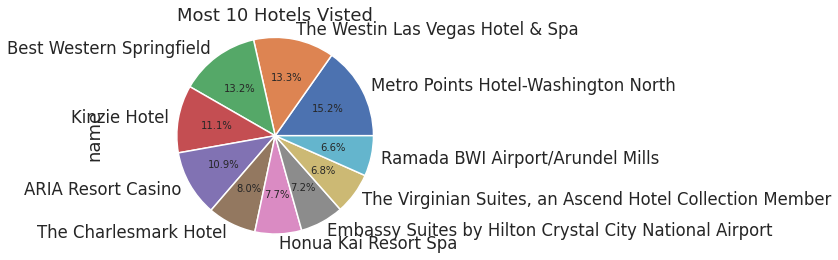

In [ ]:
train_data.name.value_counts()[:10].plot(kind='pie' ,  autopct='%1.1f%%')
plt.axis('equal')
plt.title('Most 10 Hotels Visted')

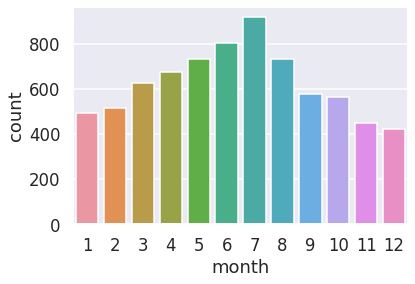

In [ ]:
ax = sns.countplot(x="month",data=train_data)

In [ ]:
train_data['dayofweek'] = pd.DatetimeIndex(train_data['reviews.date']).dayofweek
test_data['dayofweek'] = pd.DatetimeIndex(test_data['reviews.date']).dayofweek

train_data['year'] = pd.DatetimeIndex(train_data['reviews.date']).year
test_data['year'] = pd.DatetimeIndex(test_data['reviews.date']).year

In [ ]:
rate_one = train_data[train_data['reviews.rating'] == 1]
rate_tow = train_data[train_data['reviews.rating'] == 2]
rate_three = train_data[train_data['reviews.rating'] == 3]
rate_four = train_data[train_data['reviews.rating'] == 4]
rate_five = train_data[train_data['reviews.rating'] == 5]

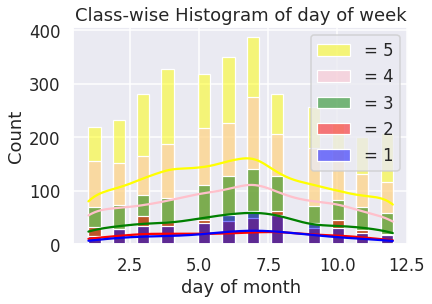

In [ ]:
#first we create the figure using Matplotlib
fig,ax=plt.subplots()

#create two histograms using Seaborn:
sns.histplot(rate_five.month, bins = 25, kde = True, label = "= 5",ax=ax, color="yellow")
sns.histplot(rate_four.month, bins = 25, kde = True, label = "= 4",ax=ax, color="pink")
sns.histplot(rate_three.month, bins = 25, kde = True, label = "= 3",ax=ax, color="green")
sns.histplot(rate_tow.month, bins = 25, kde = True, label = "= 2",ax=ax, color="red")
sns.histplot(rate_one.month, bins = 25, kde = True, label = "= 1",ax=ax, color="blue")

#Don't forget to make titles for the figure and axes
plt.title('Class-wise Histogram of day of week')
plt.xlabel('day of month')
plt.ylabel('Count')
plt.legend(loc="upper right")

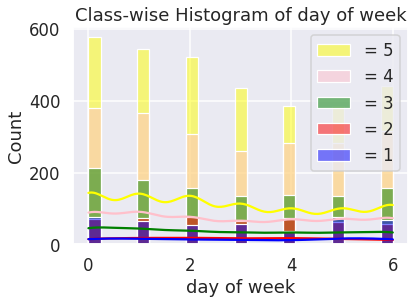

In [ ]:
#first we create the figure using Matplotlib
fig,ax=plt.subplots()

#create two histograms using Seaborn:
sns.histplot(rate_five.dayofweek, bins = 25, kde = True, label = "= 5",ax=ax, color="yellow")
sns.histplot(rate_four.dayofweek, bins = 25, kde = True, label = "= 4",ax=ax, color="pink")
sns.histplot(rate_three.dayofweek, bins = 25, kde = True, label = "= 3",ax=ax, color="green")
sns.histplot(rate_tow.dayofweek, bins = 25, kde = True, label = "= 2",ax=ax, color="red")
sns.histplot(rate_one.dayofweek, bins = 25, kde = True, label = "= 1",ax=ax, color="blue")

#Don't forget to make titles for the figure and axes
plt.title('Class-wise Histogram of day of week')
plt.xlabel('day of week')
plt.ylabel('Count')
plt.legend(loc="upper right")

Correlations

In [ ]:
train_data.corr(method='spearman')


,latitude,longitude,reviews.rating,month,dayofweek,year
latitude,1.000000,0.203402,-0.016976,0.051860,-0.009294,-0.033417
longitude,0.203402,1.000000,-0.029822,0.007218,-0.012450,-0.118810
reviews.rating,-0.016976,-0.029822,1.000000,-0.014867,-0.020178,0.037417
month,0.051860,0.007218,-0.014867,1.000000,-0.007015,-0.269129
dayofweek,-0.009294,-0.012450,-0.020178,-0.007015,1.000000,0.020503
year,-0.033417,-0.118810,0.037417,-0.269129,0.020503,1.000000


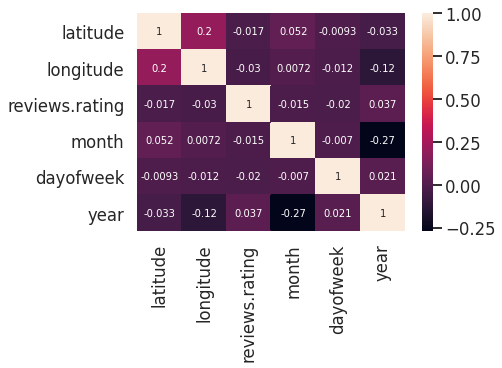

In [ ]:
sns.heatmap(train_data.corr(method='spearman'),annot=True, xticklabels=True, yticklabels=True)

Data Cleaning¶

In [ ]:
train_data.drop(['id','country', 'postalCode', 'dateAdded','dateUpdated', 'reviews.username'],inplace=True ,axis=1)

test_data.drop(['id','country', 'postalCode', 'dateAdded','dateUpdated',  'reviews.username'],inplace=True ,axis=1)

In [ ]:
# binary_variables = ['rate']
categorical_variables = ['address', 'categories', 'city','name','province','reviews.date', 'reviews.text', 'reviews.userCity', 'reviews.userProvince', 'month', 'dayofweek']
numeric_variables = ['latitude','longitude', 'year']

In [ ]:
for variable in categorical_variables:
    train_data[variable] = train_data[variable].astype('category')
    test_data[variable] = test_data[variable].astype('category')

In [ ]:
train_data[categorical_variables].describe()

,address,categories,city,name,province,reviews.date,reviews.text,reviews.userCity,reviews.userProvince,month,dayofweek
count,7500,7500,7500,7500,7500,7500,7500,3118,2016,7500,7500
unique,1659,1047,929,1512,49,2745,7486,1664,161,12,7
top,8500 Annapolis Rd,"Hotels,Hotel",Las Vegas,Metro Points Hotel-Washington North,VA,2016-04-25T00:00:00Z,Great,New York City,CA,7,0
freq,147,1432,377,147,845,28,5,38,127,917,1316


In [ ]:
for variable in numeric_variables:
    train_data[variable] = train_data[variable].astype(np.float)
    test_data[variable] = test_data[variable].astype(np.float)

In [ ]:
train_data.head()


,address,categories,primaryCategories,city,keys,latitude,longitude,name,province,reviews.date,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,sourceURLs,websites,month,dayofweek,year
8141,3000 Marina Dr,"Hotel,Hotels,Hotels Motels",Accommodation & Food Services,Moses Lake,us/wa/moseslake/3000marinadr/387493762,47.103200,-119.317600,Best Western Plus Lake Front Hotel,WA,2016-03-10T00:00:00Z,"2016-05-13T00:00:00Z,2016-07-29T00:00:00Z,2016...",4,https://www.tripadvisor.com/Hotel_Review-g5862...,Old hotel getting updates. The best part is th...,Great Real Estate,NaN,NaN,https://foursquare.com/v/best-western-plus-lak...,https://www.bestwestern.com/en_US/book/hotel-r...,3,3,2016.0
6260,811 Clover Rd,"Hotel,Hotels Motels,Hotels",Accommodation & Food Services,Tracy,us/ca/tracy/811cloverrd/1919156878,37.761900,-121.437700,Best Western Luxury Inn,CA,2015-09-21T00:00:00Z,"2016-08-05T00:00:00Z,2016-07-31T00:00:00Z,2016...",2,https://www.hotels.com/hotel/175240/reviews%20/,The woman who checked us in upon our arrival w...,Dirty bathroom and rude staff,NaN,NaN,https://foursquare.com/v/best-western-luxury-i...,https://www.bestwestern.com/en_US/book/hotel-r...,9,0,2015.0
2254,3730 Las Vegas Blvd S,"Hotels,Casinos,Resorts,Resort,Casino,Hotel",Accommodation & Food Services,Las Vegas,us/nv/lasvegas/3730lasvegasblvds/-1699935985,36.107741,-115.176268,ARIA Resort Casino,NV,2016-04-26T00:00:00Z,"2016-07-12T00:00:00Z,2016-11-05T00:00:00Z,2016...",5,https://www.tripadvisor.com/Hotel_Review-g4596...,This hotel was amazing and I couldn't stay any...,Must stay! Wish I didn't have to leave!,Texas,NaN,https://www.tripadvisor.com/Hotel_Review-g4596...,http://www.arialasvegas.com,4,1,2016.0
5937,8201 Preston Rd,"Hotel,Cocktail Bar,Lounge,Hotels,Hotels Motels...",Accommodation & Food Services,Plano,us/tx/plano/8201prestonrd/1971414100,33.088780,-96.806270,NYLO Plano at Legacy,TX,2016-04-04T00:00:00Z,"2016-08-04T00:00:00Z,2016-07-14T00:00:00Z",5,https://www.tripadvisor.com/Hotel_Review-g5646...,One hot Sunday in August our AC broke and the ...,Oasis to the Plano Heat,Dallas,TX,https://foursquare.com/v/nylo-plano-at-legacy/...,http://www.nylohotels.com/plano,4,0,2016.0
8325,110 Heritage Dr,"Hotels,Lodging,Corporate Lodging,Hotel",Accommodation & Food Services,Oxford,us/ms/oxford/110heritagedr/-514507675,34.364660,-89.557580,Hampton Inn Oxford-West,MS,2016-04-14T00:00:00Z,2016-05-10T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g4393...,The location is great for shopping resturants....,Business trip,Alexandria,LA,https://www.yellowpages.com/oxford-ms/mip/hamp...,https://ad.doubleclick.net/ddm/clk/317271033;1...,4,3,2016.0


In [ ]:
np.sum(train_data.isna())


address                    0
categories                 0
primaryCategories          0
city                       0
keys                       0
latitude                   0
longitude                  0
name                       0
province                   0
reviews.date               0
reviews.dateSeen           0
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title              0
reviews.userCity        4382
reviews.userProvince    5484
sourceURLs                 0
websites                   0
month                      0
dayofweek                  0
year                       0
dtype: int64

In [ ]:
imputed_variables = ['reviews.date','reviews.userCity', 'reviews.userProvince']
imputed_values = train_data[imputed_variables].mode()

print(imputed_values)

           reviews.date reviews.userCity reviews.userProvince
0  2016-04-25T00:00:00Z    New York City                   CA


In [ ]:
for variable in imputed_variables:
    train_data[variable].fillna(value = imputed_values[variable][0], inplace=True)
    train_data[variable].cat.remove_unused_categories(inplace=True)
    
    
    
np.sum(train_data.isna())
    

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


address                 0
categories              0
primaryCategories       0
city                    0
keys                    0
latitude                0
longitude               0
name                    0
province                0
reviews.date            0
reviews.dateSeen        0
reviews.rating          0
reviews.sourceURLs      0
reviews.text            0
reviews.title           0
reviews.userCity        0
reviews.userProvince    0
sourceURLs              0
websites                0
month                   0
dayofweek               0
year                    0
dtype: int64

In [ ]:
imputed_variables = ['reviews.date','reviews.userCity', 'reviews.userProvince']
imputed_values = test_data[imputed_variables].mode()

for variable in imputed_variables:

    
    test_data[variable].fillna(value = imputed_values[variable][0], inplace=True)
    test_data[variable].cat.remove_unused_categories(inplace=True)
    
np.sum(train_data.isna())

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


address                 0
categories              0
primaryCategories       0
city                    0
keys                    0
latitude                0
longitude               0
name                    0
province                0
reviews.date            0
reviews.dateSeen        0
reviews.rating          0
reviews.sourceURLs      0
reviews.text            0
reviews.title           0
reviews.userCity        0
reviews.userProvince    0
sourceURLs              0
websites                0
month                   0
dayofweek               0
year                    0
dtype: int64

In [ ]:
def binning(col,bin_num):
    #Define min and max values:
    minval = col.min()
    maxval = col.max()


    #Binning using cut function of pandas
    colBin = pd.cut(col,bin_num,include_lowest=True,precision=0)
    
    #Rename the categories after the interval
    colBin=colBin.cat.rename_categories([f'{int(colBin.left)}_{int(colBin.right)}' for colBin in colBin.cat.categories])
    
    return colBin

In [ ]:
numeric_variables_binned = []


In [ ]:
for variable in numeric_variables:
    binned_output_column = variable + "_binned"
    train_data[binned_output_column] = binning(train_data[variable],20)
    test_data[binned_output_column] = binning(test_data[variable],20)
    numeric_variables_binned.append(binned_output_column)

Textual Features and NLP Tools¶


histogram

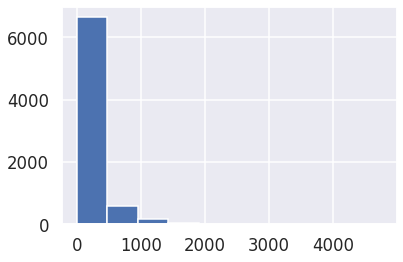

In [ ]:
#number of characters histogram
train_data['reviews.text'].str.len().hist()
# Let's add the text len to the fetures list
train_data['characters_len']=train_data['reviews.text'].str.len()

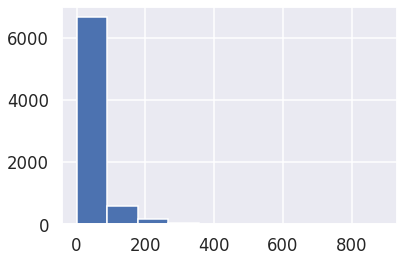

In [ ]:
#number of words histogram:

train_data['reviews.text'].str.split().apply(lambda x: len(x)).hist()
# Let's add the number of words in the review to the fetures list
train_data['words_len']=train_data['reviews.text'].str.split().apply(lambda x: len(x))

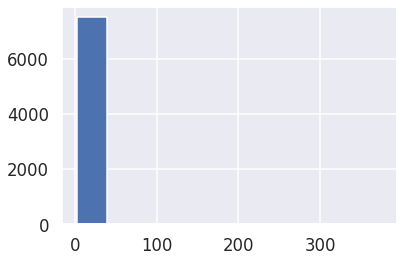

In [ ]:
#average word length:
train_data['reviews.text'].str.split(). \
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
# Let's add the evarage len of each word in the review to the fetures list
train_data['average_word']=train_data['reviews.text'].str.split(). \
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x))

Analyzing Stop-Words



In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
english_sw = stopwords.words('english')
#Creating a word corpus
r = train_data['reviews.text'].str.split()
r=r.values.tolist()
wcorpus=[word for i in r for word in i]
print(wcorpus[:50])
len(wcorpus)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['Old', 'hotel', 'getting', 'updates.', 'The', 'best', 'part', 'is', 'that', 'it', 'is', 'on', 'the', 'lake.', 'I', 'enjoyed', 'the', 'view', 'during', 'breakfast', 'and', 'a', 'quick', 'jaunt', 'outside', 'started', 'my', 'work', 'day', 'off', 'right.', 'Next', 'time', 'I', 'will', 'try', 'to', 'get', 'a', 'first', 'floor', 'lake', 'view', 'room.', 'No', 'complaints.', 'The', 'woman', 'who', 'checked']


440704

In [ ]:
from collections import Counter
counter=Counter(wcorpus)
most=counter.most_common(10)
print(most)

[('the', 20173), ('and', 16152), ('was', 11713), ('to', 11427), ('a', 10886), ('The', 6511), ('I', 6368), ('in', 6165), ('of', 5285), ('for', 5196)]


In [ ]:
from collections import defaultdict
sw_dic=defaultdict(int)
all_dic=defaultdict(int)
for word in wcorpus:
    if word in english_sw:
        sw_dic[word]+=1
    else:
        all_dic[word]+=1
stop_counts = pd.Series(sw_dic)
stop_counts = stop_counts.sort_values(ascending=False)        
        
stop_counts.sum()/len(wcorpus)

0.4038016446413012

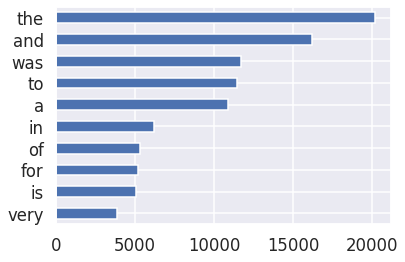

In [ ]:
stop_counts.head(10).sort_values().plot(kind='barh')


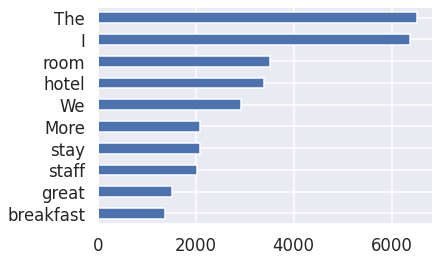

In [ ]:
#most common non-stopwords: 
all_counts = pd.Series(all_dic)
all_counts = all_counts.sort_values(ascending=False)
all_counts.head(10).sort_values().plot(kind='barh')

N-Grams

In [ ]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
sentences_corpus = list(train_data['reviews.text'].values)
sentences_corpus[:5]

['Old hotel getting updates. The best part is that it is on the lake. I enjoyed the view during breakfast and a quick jaunt outside started my work day off right. Next time I will try to get a first floor lake view room. No complaints.',
 "The woman who checked us in upon our arrival was incredibly rude and immediately put a damper on stay. I'm not sure if we were given a handicapped room or if they are all similar, but the bathroom didn't have a tub and was absolutely disgusting. It was one big room with a drain in the floor and did not appear to have been cleaned in some time. One corner appeared to have blood. At 5 a.m. A group of workers with coolers stood at the end of the other hallway from us and we're speaking so loudly for over 10 minutes it woke up my husband, my infant, and I. As my in laws have recently moved to the area I expect we will be visiting Tracy frequently but I will NEVER again stay at this hotel.",
 "This hotel was amazing and I couldn't stay anywhere else now! 

In [ ]:
cv = CountVectorizer(ngram_range=(2, 2),stop_words=english_sw)
vecs =cv.fit_transform(sentences_corpus)
len(cv.vocabulary_)

133611

In [ ]:
vecs.shape


(7500, 133611)

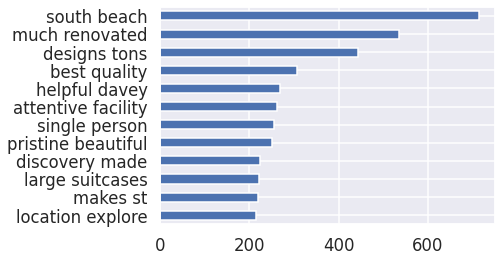

In [ ]:
sum_bigrams = vecs.sum(axis=0)
sum_series = pd.Series(sum_bigrams.A1,index=list(cv.vocabulary_))
sum_series.sort_values(ascending=False).head(12).sort_values().plot(kind='barh')

Topic modeling exploration

In [ ]:
import spacy
from spacy.lang.en import English
# python3 -m spacy download en_core_web_sm
import en_core_web_sm
nlp = en_core_web_sm.load()
def lemmatizer(doc):
    # This takes in a doc of tokens from the NER and lemmatizes them. 
    # Pronouns (like "I" and "you" get lemmatized to '-PRON-', so I'm removing those.
    doc = [token.lemma_ for token in doc if token.lemma_ != '-PRON-']
    doc = u' '.join(doc)
    return nlp.make_doc(doc)
    
def remove_stopwords(doc):
    # This will remove stopwords and punctuation.
    # Use token.text to return strings, which we'll need for Gensim.
    doc = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
    return doc

# The add_pipe function appends our functions to the default pipeline.
corpus=[]

for sentence in tqdm(sentences_corpus[:10000]):
    doc = nlp(sentence)
    doc = lemmatizer(doc)
    doc = remove_stopwords(doc)
    corpus.append(doc)

100%|██████████| 7500/7500 [03:48<00:00, 32.83it/s]


In [ ]:
for i in zip(sentences_corpus[:10],corpus[:10]):
    print(i[0],"--->",i[1])

Old hotel getting updates. The best part is that it is on the lake. I enjoyed the view during breakfast and a quick jaunt outside started my work day off right. Next time I will try to get a first floor lake view room. No complaints. ---> ['old', 'hotel', 'update', 'good', 'lake', 'enjoy', 'view', 'breakfast', 'quick', 'jaunt', 'outside', 'start', 'work', 'day', 'right', 'time', 'try', 'floor', 'lake', 'view', 'room', 'complaint']
The woman who checked us in upon our arrival was incredibly rude and immediately put a damper on stay. I'm not sure if we were given a handicapped room or if they are all similar, but the bathroom didn't have a tub and was absolutely disgusting. It was one big room with a drain in the floor and did not appear to have been cleaned in some time. One corner appeared to have blood. At 5 a.m. A group of workers with coolers stood at the end of the other hallway from us and we're speaking so loudly for over 10 minutes it woke up my husband, my infant, and I. As my 

In [ ]:
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]
bow_corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 2),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 2),
 (19, 1)]

In [ ]:
list(dict(dic).items())[:10]

[(0, 'breakfast'),
 (1, 'complaint'),
 (2, 'day'),
 (3, 'enjoy'),
 (4, 'floor'),
 (5, 'good'),
 (6, 'hotel'),
 (7, 'jaunt'),
 (8, 'lake'),
 (9, 'old')]

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                  num_topics = 100, 
                                  id2word = dic,                                    
                                  passes = 10,
                                  workers = 4)
lda_model.show_topics()[:5]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


[(87,
  '0.026*"hotel" + 0.023*"staff" + 0.022*"great" + 0.019*"stay" + 0.017*"room" + 0.015*"breakfast" + 0.015*"good" + 0.013*"location" + 0.012*"clean" + 0.010*"friendly"'),
 (24,
  '0.028*"hotel" + 0.026*"room" + 0.016*"stay" + 0.016*"clean" + 0.015*"staff" + 0.014*"great" + 0.013*"nice" + 0.010*"little" + 0.009*"comfortable" + 0.009*"breakfast"'),
 (64,
  '0.041*"room" + 0.022*"hotel" + 0.017*"good" + 0.014*"breakfast" + 0.013*"location" + 0.012*"staff" + 0.012*"restaurant" + 0.011*"walk" + 0.010*"clean" + 0.010*"place"'),
 (98,
  '0.025*"hotel" + 0.022*"room" + 0.018*"waffle" + 0.017*"bug" + 0.014*"stay" + 0.013*"cab" + 0.012*"clean" + 0.012*"stain" + 0.011*"Breakfast" + 0.010*"bed"'),
 (39,
  '0.038*"room" + 0.022*"hotel" + 0.019*"charge" + 0.017*"book" + 0.014*"card" + 0.013*"stay" + 0.013*"good" + 0.012*"bad" + 0.011*"check" + 0.011*"credit"')]

In [ ]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
91     0.123940  0.027765       1        1  3.748113
56     0.241103 -0.119711       2        1  3.713140
22     0.048806  0.069264       3        1  2.880857
37     0.082386 -0.023013       4        1  2.800440
65     0.035095  0.040243       5        1  2.210874
...         ...       ...     ...      ...       ...
98    -0.119930 -0.016444      96        1  0.410097
83    -0.061101 -0.040108      97        1  0.400052
63    -0.105752 -0.104580      98        1  0.326968
21    -0.043668 -0.107588      99        1  0.321432
27    -0.096079 -0.135303     100        1  0.227138

[100 rows x 5 columns], topic_info=         Term         Freq        Total  Category  logprob  loglift
13       room  6133.000000  6133.000000   Default  30.0000  30.0000
5        good  2965.000000  2965.000000   Default  29.0000  29.0000
6       hotel  4764.000000  4764.000000   Default  28.0000  28.0000
109     great  2542.000000  2542.000000   Default  27.0000  27.0000
57       stay  4228.000000  4228.000000   Default  26.0000  26.0000
..        ...          ...          ...       ...      ...      ...
167   service     2.704606  1029.346205  Topic100  -5.1209   0.1456
111  location     2.284947  1428.024729  Topic100  -5.2895  -0.3503
381      turn     1.930447   112.457975  Topic100  -5.4581   2.0225
371       way     1.972335   361.070898  Topic100  -5.4366   0.8775
557        tv     1.933398   218.566877  Topic100  -5.4565   1.3596

[7892 rows x 6 columns], token_table=      Topic      Freq                                               Term
term                                                                    
4551      9  0.033370                                                   
4551     11  0.016685                                                   
4551     21  0.617339                                                   
4551     27  0.066739                                                   
4551     53  0.050055                                                   
...     ...       ...                                                ...
9717     18  0.507788                   ÊÑü„Åò„ÅßÁ∂∫È∫ó„Åß„Åó„Åü„ÄÇ„ÇØ„É
9718     18  0.507780                                      åæêñπ„åøáöüë¶
9720     18  0.507759  ‰∫åÊ≥ä„Åó„Åæ„Åó„Åü„ÄÇÁ´ãÂú∞„ÇÇËâØ„Åè„ÄÅË¶≥ÂÖâ„...
9721     18  0.828161                                                  ™
8941     88  0.715874                                                 √†

[41215 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[92, 57, 23, 38, 66, 50, 90, 97, 40, 68, 39, 5, 77, 60, 51, 41, 81, 63, 11, 100, 17, 87, 70, 46, 85, 15, 30, 21, 49, 18, 75, 33, 34, 7, 62, 98, 20, 65, 96, 94, 37, 42, 55, 78, 16, 27, 67, 72, 13, 44, 76, 82, 1, 56, 32, 91, 9, 86, 25, 35, 61, 43, 12, 74, 79, 53, 69, 54, 58, 47, 14, 4, 89, 83, 88, 80, 73, 10, 36, 26, 8, 3, 95, 19, 31, 24, 45, 6, 48, 2, 93, 71, 52, 29, 59, 99, 84, 64, 22, 28])

Let's improve the resualts with cleaner text

In [ ]:
import string
import re
def clean_document(doco):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', doco)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    return doco_clean

In [ ]:
review_clean = [clean_document(doc) for doc in train_data['reviews.text']]
sentences = [' '.join(r) for r in review_clean]

In [ ]:
# train_data['cleantext']=sentences
train_data['reviews.text']=sentences
train_data.head()

,address,categories,primaryCategories,city,keys,latitude,longitude,name,province,reviews.date,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,sourceURLs,websites,month,dayofweek,year,latitude_binned,longitude_binned,year_binned,characters_len,words_len,average_word
8141,3000 Marina Dr,"Hotel,Hotels,Hotels Motels",Accommodation & Food Services,Moses Lake,us/wa/moseslake/3000marinadr/387493762,47.103200,-119.317600,Best Western Plus Lake Front Hotel,WA,2016-03-10T00:00:00Z,"2016-05-13T00:00:00Z,2016-07-29T00:00:00Z,2016...",4,https://www.tripadvisor.com/Hotel_Review-g5862...,old hotel getting updates the best part that t...,Great Real Estate,New York City,CA,https://foursquare.com/v/best-western-plus-lak...,https://www.bestwestern.com/en_US/book/hotel-r...,3,3,2016.0,45_47,-123_-118,2015_2016,233,46,4.086957
6260,811 Clover Rd,"Hotel,Hotels Motels,Hotels",Accommodation & Food Services,Tracy,us/ca/tracy/811cloverrd/1919156878,37.761900,-121.437700,Best Western Luxury Inn,CA,2015-09-21T00:00:00Z,"2016-08-05T00:00:00Z,2016-07-31T00:00:00Z,2016...",2,https://www.hotels.com/hotel/175240/reviews%20/,the woman who checked upon our arrival was inc...,Dirty bathroom and rude staff,New York City,CA,https://foursquare.com/v/best-western-luxury-i...,https://www.bestwestern.com/en_US/book/hotel-r...,9,0,2015.0,37_40,-123_-118,2014_2015,693,138,4.028986
2254,3730 Las Vegas Blvd S,"Hotels,Casinos,Resorts,Resort,Casino,Hotel",Accommodation & Food Services,Las Vegas,us/nv/lasvegas/3730lasvegasblvds/-1699935985,36.107741,-115.176268,ARIA Resort Casino,NV,2016-04-26T00:00:00Z,"2016-07-12T00:00:00Z,2016-11-05T00:00:00Z,2016...",5,https://www.tripadvisor.com/Hotel_Review-g4596...,this hotel was amazing and couldn stay anywher...,Must stay! Wish I didn't have to leave!,Texas,CA,https://www.tripadvisor.com/Hotel_Review-g4596...,http://www.arialasvegas.com,4,1,2016.0,35_37,-118_-114,2015_2016,325,61,4.344262
5937,8201 Preston Rd,"Hotel,Cocktail Bar,Lounge,Hotels,Hotels Motels...",Accommodation & Food Services,Plano,us/tx/plano/8201prestonrd/1971414100,33.088780,-96.806270,NYLO Plano at Legacy,TX,2016-04-04T00:00:00Z,"2016-08-04T00:00:00Z,2016-07-14T00:00:00Z",5,https://www.tripadvisor.com/Hotel_Review-g5646...,one hot sunday august our broke and the house ...,Oasis to the Plano Heat,Dallas,TX,https://foursquare.com/v/nylo-plano-at-legacy/...,http://www.nylohotels.com/plano,4,0,2016.0,32_35,-100_-96,2015_2016,270,61,3.442623
8325,110 Heritage Dr,"Hotels,Lodging,Corporate Lodging,Hotel",Accommodation & Food Services,Oxford,us/ms/oxford/110heritagedr/-514507675,34.364660,-89.557580,Hampton Inn Oxford-West,MS,2016-04-14T00:00:00Z,2016-05-10T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g4393...,the location great for shopping resturants the...,Business trip,Alexandria,LA,https://www.yellowpages.com/oxford-ms/mip/hamp...,https://ad.doubleclick.net/ddm/clk/317271033;1...,4,3,2016.0,32_35,-91_-86,2015_2016,232,39,4.974359


In [ ]:
!pip install twython
!pip install nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sid = SentimentIntensityAnalyzer()


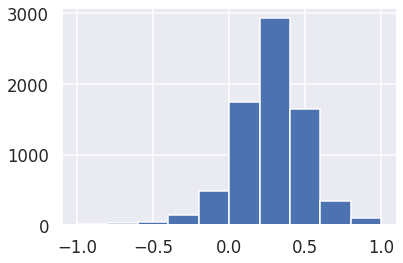

In [ ]:
from textblob import TextBlob
# def _polarity(text):
#     return TextBlob(text).sentiment.polarity
        
polarity_text_score = train_data['reviews.text'].apply(lambda x : TextBlob(x).sentiment.polarity)
polarity_score_test = test_data['reviews.text'].apply(lambda x : TextBlob(x).sentiment.polarity)
polarity_text_score.hist()


polarity_title_score = train_data['reviews.title'].apply(lambda x : TextBlob(x).sentiment.polarity)
polarity_score_test_title = test_data['reviews.title'].apply(lambda x : TextBlob(x).sentiment.polarity)

In [ ]:
train_data['polarity_text'] = polarity_text_score
test_data['polarity_text'] = polarity_score_test

train_data['polarity_title'] = polarity_title_score
test_data['polarity_title'] = polarity_score_test_title

In [ ]:
train_data['polarity_text'].head()


8141    0.308631
6260   -0.163889
2254    0.179688
5937    0.212338
8325    0.372000
Name: polarity_text, dtype: float64

In [ ]:
train_data['polarity_title'].head()


8141    0.50
6260   -0.45
2254    0.00
5937    0.00
8325    0.00
Name: polarity_title, dtype: float64

Let's try to get some intuition on which words expected to be included positive and negative reviews

In [ ]:
positive_review = train_data[train_data['reviews.rating']>=5]

In [ ]:
negative_review = train_data[train_data['reviews.rating']<=1]

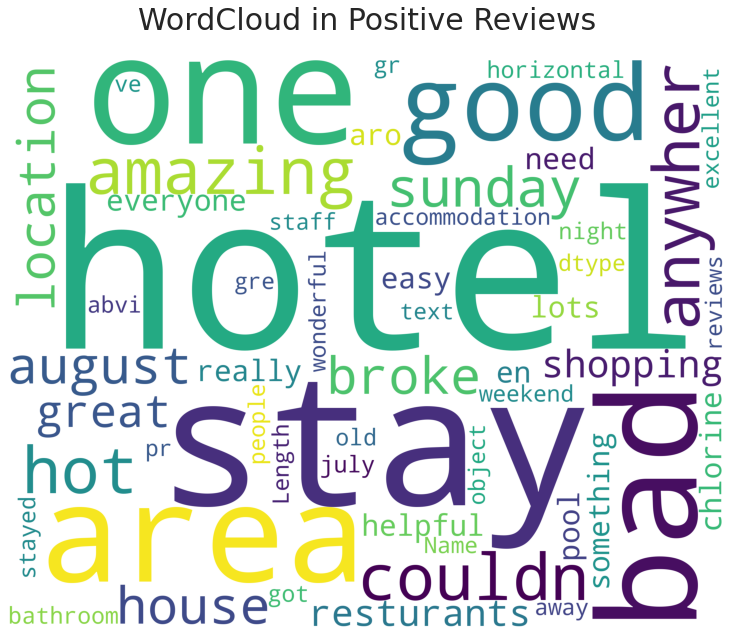

In [ ]:
from wordcloud import WordCloud

def show_wordCloud(text,title):
    wordcloud = WordCloud(
                    background_color ='white', 
                    max_words = 200,
                      width=2500,
                      height=2000,
                    min_font_size = 10).generate(str(text))

    plt.figure(figsize = (10,10)) 
    plt.title(title,fontsize =30, pad = 30)
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()


# Wordcloud in positive reviews

show_wordCloud(positive_review['reviews.text'],'WordCloud in Positive Reviews')

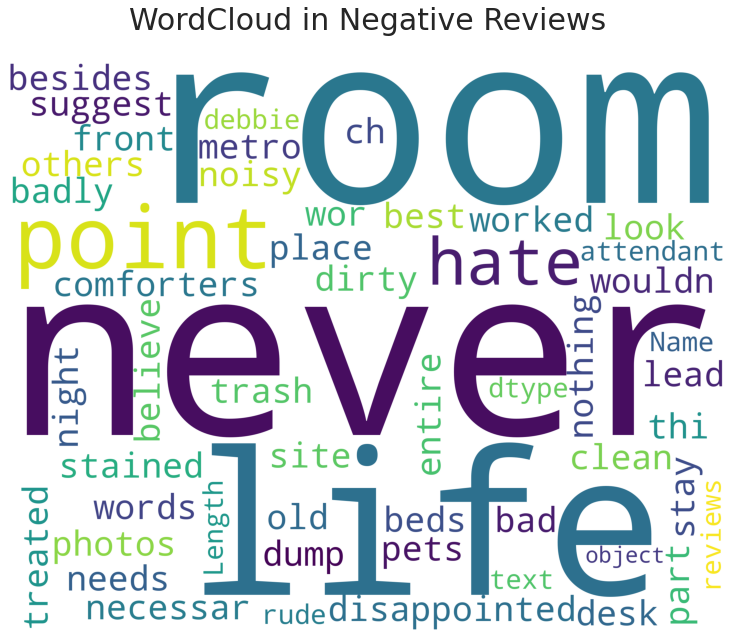

In [ ]:
# Wordcloud in Negative reviews

show_wordCloud(negative_review['reviews.text'],'WordCloud in Negative Reviews')

In [ ]:
def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])

In [ ]:
train_data.loc[:,'polarity_text'] *= 100
test_data.loc[:,'polarity_text'] *= 100
# train_data["polarity"].value_counts()

In [ ]:
train_data.loc[:,'polarity_title'] *= 100
test_data.loc[:,'polarity_title'] *= 100
# train_data["polarity"].value_counts()

train_data.head()

,address,categories,primaryCategories,city,keys,latitude,longitude,name,province,reviews.date,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,sourceURLs,websites,month,dayofweek,year,latitude_binned,longitude_binned,year_binned,characters_len,words_len,average_word,polarity_text,polarity_title
8141,3000 Marina Dr,"Hotel,Hotels,Hotels Motels",Accommodation & Food Services,Moses Lake,us/wa/moseslake/3000marinadr/387493762,47.103200,-119.317600,Best Western Plus Lake Front Hotel,WA,2016-03-10T00:00:00Z,"2016-05-13T00:00:00Z,2016-07-29T00:00:00Z,2016...",4,https://www.tripadvisor.com/Hotel_Review-g5862...,old hotel getting updates the best part that t...,Great Real Estate,New York City,CA,https://foursquare.com/v/best-western-plus-lak...,https://www.bestwestern.com/en_US/book/hotel-r...,3,3,2016.0,45_47,-123_-118,2015_2016,233,46,4.086957,30.863095,50.0
6260,811 Clover Rd,"Hotel,Hotels Motels,Hotels",Accommodation & Food Services,Tracy,us/ca/tracy/811cloverrd/1919156878,37.761900,-121.437700,Best Western Luxury Inn,CA,2015-09-21T00:00:00Z,"2016-08-05T00:00:00Z,2016-07-31T00:00:00Z,2016...",2,https://www.hotels.com/hotel/175240/reviews%20/,the woman who checked upon our arrival was inc...,Dirty bathroom and rude staff,New York City,CA,https://foursquare.com/v/best-western-luxury-i...,https://www.bestwestern.com/en_US/book/hotel-r...,9,0,2015.0,37_40,-123_-118,2014_2015,693,138,4.028986,-16.388889,-45.0
2254,3730 Las Vegas Blvd S,"Hotels,Casinos,Resorts,Resort,Casino,Hotel",Accommodation & Food Services,Las Vegas,us/nv/lasvegas/3730lasvegasblvds/-1699935985,36.107741,-115.176268,ARIA Resort Casino,NV,2016-04-26T00:00:00Z,"2016-07-12T00:00:00Z,2016-11-05T00:00:00Z,2016...",5,https://www.tripadvisor.com/Hotel_Review-g4596...,this hotel was amazing and couldn stay anywher...,Must stay! Wish I didn't have to leave!,Texas,CA,https://www.tripadvisor.com/Hotel_Review-g4596...,http://www.arialasvegas.com,4,1,2016.0,35_37,-118_-114,2015_2016,325,61,4.344262,17.968750,0.0
5937,8201 Preston Rd,"Hotel,Cocktail Bar,Lounge,Hotels,Hotels Motels...",Accommodation & Food Services,Plano,us/tx/plano/8201prestonrd/1971414100,33.088780,-96.806270,NYLO Plano at Legacy,TX,2016-04-04T00:00:00Z,"2016-08-04T00:00:00Z,2016-07-14T00:00:00Z",5,https://www.tripadvisor.com/Hotel_Review-g5646...,one hot sunday august our broke and the house ...,Oasis to the Plano Heat,Dallas,TX,https://foursquare.com/v/nylo-plano-at-legacy/...,http://www.nylohotels.com/plano,4,0,2016.0,32_35,-100_-96,2015_2016,270,61,3.442623,21.233766,0.0
8325,110 Heritage Dr,"Hotels,Lodging,Corporate Lodging,Hotel",Accommodation & Food Services,Oxford,us/ms/oxford/110heritagedr/-514507675,34.364660,-89.557580,Hampton Inn Oxford-West,MS,2016-04-14T00:00:00Z,2016-05-10T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g4393...,the location great for shopping resturants the...,Business trip,Alexandria,LA,https://www.yellowpages.com/oxford-ms/mip/hamp...,https://ad.doubleclick.net/ddm/clk/317271033;1...,4,3,2016.0,32_35,-91_-86,2015_2016,232,39,4.974359,37.200000,0.0


*Viewing* Correlations to the target feature:

In [ ]:
dtf_corr = train_data.corr(method="pearson").loc[["reviews.rating"]]

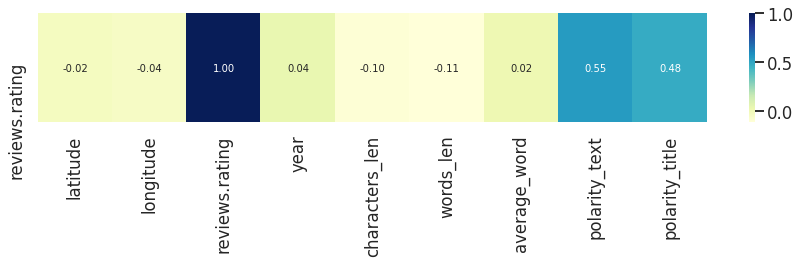

In [ ]:
fig, ax = plt.subplots(figsize=(15,2))
sns.heatmap(dtf_corr, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True,ax=ax)

We can see that the text and title polarity have the highest correlation with the reviews rating. Let's drop the no needed columns and focus on the text analysis

In [ ]:
train_data.drop(['address', 'categories', 'city', 'province',  'reviews.date',  'reviews.userCity', 'reviews.userProvince','latitude','longitude'],inplace=True
 ,axis=1)

test_data.drop(['address', 'categories', 'city',  'province',  'reviews.date', 'reviews.userCity', 'reviews.userProvince','latitude','longitude'],inplace=True
 ,axis=1)

In [ ]:
train_data.head()

,primaryCategories,keys,name,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,sourceURLs,websites,month,dayofweek,year,latitude_binned,longitude_binned,year_binned,characters_len,words_len,average_word,polarity_text,polarity_title
8141,Accommodation & Food Services,us/wa/moseslake/3000marinadr/387493762,Best Western Plus Lake Front Hotel,"2016-05-13T00:00:00Z,2016-07-29T00:00:00Z,2016...",4,https://www.tripadvisor.com/Hotel_Review-g5862...,old hotel getting updates the best part that t...,Great Real Estate,https://foursquare.com/v/best-western-plus-lak...,https://www.bestwestern.com/en_US/book/hotel-r...,3,3,2016.0,45_47,-123_-118,2015_2016,233,46,4.086957,30.863095,50.0
6260,Accommodation & Food Services,us/ca/tracy/811cloverrd/1919156878,Best Western Luxury Inn,"2016-08-05T00:00:00Z,2016-07-31T00:00:00Z,2016...",2,https://www.hotels.com/hotel/175240/reviews%20/,the woman who checked upon our arrival was inc...,Dirty bathroom and rude staff,https://foursquare.com/v/best-western-luxury-i...,https://www.bestwestern.com/en_US/book/hotel-r...,9,0,2015.0,37_40,-123_-118,2014_2015,693,138,4.028986,-16.388889,-45.0
2254,Accommodation & Food Services,us/nv/lasvegas/3730lasvegasblvds/-1699935985,ARIA Resort Casino,"2016-07-12T00:00:00Z,2016-11-05T00:00:00Z,2016...",5,https://www.tripadvisor.com/Hotel_Review-g4596...,this hotel was amazing and couldn stay anywher...,Must stay! Wish I didn't have to leave!,https://www.tripadvisor.com/Hotel_Review-g4596...,http://www.arialasvegas.com,4,1,2016.0,35_37,-118_-114,2015_2016,325,61,4.344262,17.968750,0.0
5937,Accommodation & Food Services,us/tx/plano/8201prestonrd/1971414100,NYLO Plano at Legacy,"2016-08-04T00:00:00Z,2016-07-14T00:00:00Z",5,https://www.tripadvisor.com/Hotel_Review-g5646...,one hot sunday august our broke and the house ...,Oasis to the Plano Heat,https://foursquare.com/v/nylo-plano-at-legacy/...,http://www.nylohotels.com/plano,4,0,2016.0,32_35,-100_-96,2015_2016,270,61,3.442623,21.233766,0.0
8325,Accommodation & Food Services,us/ms/oxford/110heritagedr/-514507675,Hampton Inn Oxford-West,2016-05-10T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g4393...,the location great for shopping resturants the...,Business trip,https://www.yellowpages.com/oxford-ms/mip/hamp...,https://ad.doubleclick.net/ddm/clk/317271033;1...,4,3,2016.0,32_35,-91_-86,2015_2016,232,39,4.974359,37.200000,0.0


In [ ]:
train_data.drop(['primaryCategories', 'keys', 'reviews.dateSeen', 'name',  'reviews.sourceURLs',  'sourceURLs', 'websites'],inplace=True
 ,axis=1)

test_data.drop(['primaryCategories', 'keys', 'reviews.dateSeen',  'name',  'reviews.sourceURLs', 'sourceURLs', 'websites'],inplace=True
 ,axis=1)

"One Hot" Encoding¶


In [ ]:
binned_output_column = "polarity_binned"
train_data[binned_output_column] = binning(train_data["polarity_text"],20)
test_data[binned_output_column] = binning(test_data["polarity_text"],20)
numeric_variables_binned.append(binned_output_column)

In [ ]:
binned_output_column = "polarity_binned"
train_data[binned_output_column] = binning(train_data["polarity_title"],20)
test_data[binned_output_column] = binning(test_data["polarity_title"],20)
numeric_variables_binned.append(binned_output_column)

In [ ]:
one_hot_categorical = ['month', 'dayofweek']


In [ ]:
#Encode all binned numeric columns and categorical columns with oneHot

#we leave the target feature as is
oh_train = train_data['reviews.rating']
oh_test = test_data['reviews.rating']

#now adding the one hot encoded data
for variable in numeric_variables_binned + one_hot_categorical:
    onehot_train_col = pd.get_dummies(train_data[variable],prefix=variable)
    oh_train = pd.concat([oh_train,onehot_train_col],axis=1)
    
    onehot_test_col = pd.get_dummies(test_data[variable],prefix=variable)
    oh_test = pd.concat([oh_test,onehot_test_col],axis=1)

In [ ]:
oh_train.head()


,reviews.rating,latitude_binned_18_22,latitude_binned_22_25,latitude_binned_25_27,latitude_binned_27_30,latitude_binned_30_32,latitude_binned_32_35,latitude_binned_35_37,latitude_binned_37_40,latitude_binned_40_42,latitude_binned_42_45,latitude_binned_45_47,latitude_binned_47_50,latitude_binned_50_52,latitude_binned_52_55,latitude_binned_55_57,latitude_binned_57_60,latitude_binned_60_63,latitude_binned_63_65,latitude_binned_65_68,latitude_binned_68_70,longitude_binned_-161_-155,longitude_binned_-155_-150,longitude_binned_-150_-146,longitude_binned_-146_-141,longitude_binned_-141_-137,longitude_binned_-137_-132,longitude_binned_-132_-128,longitude_binned_-128_-123,longitude_binned_-123_-118,longitude_binned_-118_-114,longitude_binned_-114_-109,longitude_binned_-109_-105,longitude_binned_-105_-100,longitude_binned_-100_-96,longitude_binned_-96_-91,longitude_binned_-91_-86,longitude_binned_-86_-82,longitude_binned_-82_-77,longitude_binned_-77_-73,...,polarity_binned_90_100,polarity_binned_-101_-90,polarity_binned_-90_-80,polarity_binned_-80_-70,polarity_binned_-70_-60,polarity_binned_-60_-50,polarity_binned_-50_-40,polarity_binned_-40_-30,polarity_binned_-30_-20,polarity_binned_-20_-10,polarity_binned_-10_0,polarity_binned_0_10,polarity_binned_10_20,polarity_binned_20_30,polarity_binned_30_40,polarity_binned_40_50,polarity_binned_50_60,polarity_binned_60_70,polarity_binned_70_80,polarity_binned_80_90,polarity_binned_90_100,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
8141,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6260,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2254,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5937,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8325,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
oh_train.shape

(7500, 120)

In [ ]:
add_to_test = list(set(oh_train.columns) - set(oh_test.columns))


In [ ]:
oh_test.shape


(2500, 120)

In [ ]:
add_to_train = list(set(oh_test.columns) - set(oh_train.columns))


In [ ]:
for col in add_to_train:
    oh_train[col] = 0
for col in add_to_test:
    oh_test[col] = 0

In [ ]:
set(oh_test.columns) == set(oh_train.columns)


True

Train the model: Logistic regression, Using SKLearn¶


In [ ]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(max_iter=1000)

In [ ]:
#separate labels from data
train_class = oh_train['reviews.rating']
oh_train_data = oh_train.drop('reviews.rating',axis=1) #features

In [ ]:
#train the model:
logreg.fit(oh_train_data, train_class)


Evaluate results- Logistic *regression*

In [ ]:
test_class = oh_test['reviews.rating']
expected = test_class.values
oh_test_data= oh_test.drop('reviews.rating',axis=1)

In [ ]:
oh_test_data.shape

(2500, 138)

In [ ]:
oh_train_data.shape

(7500, 138)

In [ ]:
from sklearn import metrics
predicted = logreg.predict(oh_test_data)
predicted_probs = logreg.predict_proba(oh_test_data)

In [ ]:
print(metrics.classification_report(expected, predicted,labels=[1, 2, 3,4,5]))

accuracy = accuracy_score(test_class, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


              precision    recall  f1-score   support

           1       0.43      0.26      0.33       160
           2       0.30      0.08      0.13       182
           3       0.24      0.05      0.09       352
           4       0.36      0.26      0.30       710
           5       0.50      0.80      0.62      1096

    accuracy                           0.46      2500
   macro avg       0.37      0.29      0.29      2500
weighted avg       0.41      0.46      0.40      2500

Accuracy: 45.80%


CROSS VALIDATION¶


In [ ]:
scoring = None #accuracy will be used
#scoring = 'precision'
#scoring = 'recall'

In [ ]:
X = pd.concat([oh_train_data, oh_test_data], axis=1)
Y = pd.concat([train_class, test_class] , axis=1)
X = X.reset_index()
Y = Y.reset_index()

In [ ]:
X.fillna(0 , inplace = True)
Y.fillna(0, inplace = True )

In [ ]:
X.shape


(10000, 277)

In [ ]:
Y = Y.loc[:,~Y.columns.duplicated()]


In [ ]:
Y=Y.drop(['index'], axis=1)


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X , Y.values.ravel(), cv=5,scoring=scoring )

scores


In [ ]:
print(f"Mean",": %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Mean : 0.58 (+/- 0.05)


Evaluation Plots¶


In [ ]:
import sklearn.metrics


In [ ]:
y_true = expected
y_score = predicted_probs[:,1]

In [ ]:
def plotPR(precision, recall):
    plt.figure()
    plt.plot(recall, precision, label='PR curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall curve')
    plt.legend(loc='lower left')
    plt.show()

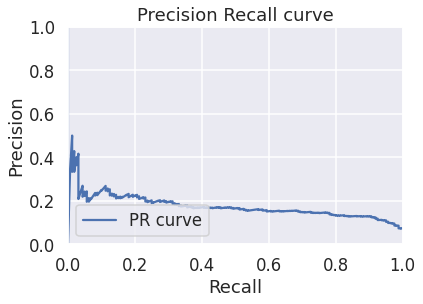

In [ ]:
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_true, y_score,pos_label =1)
plotPR(precision, recall)

Decision tree regressor

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
clf = DecisionTreeClassifier()
clf = clf.fit(oh_train_data,train_class)
y_pred = clf.predict(oh_test_data)

accuracy = accuracy_score(test_class, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

recall = recall_score(test_class, y_pred , average='weighted')
print("Recall: %.2f%%" % (recall * 100.0))

precision = precision_score(test_class, y_pred , average='weighted')
print("Precision: %.2f%%" % (precision * 100.0))

f1=f1_score(test_class, y_pred, average='weighted')
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 37.04%
Recall: 37.04%
Precision: 37.07%
F1: 37.04%


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rm_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)

rm_classifier.fit(oh_train_data, train_class)
y_pred = rm_classifier.predict(oh_test_data)

accuracy = accuracy_score(test_class, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

recall = recall_score(test_class, y_pred , average='weighted')
print("Recall: %.2f%%" % (recall * 100.0))

precision = precision_score(test_class, y_pred , average='weighted')
print("Precision: %.2f%%" % (precision * 100.0))

f1=f1_score(test_class, y_pred, average='weighted')
print("F1: %.2f%%" % (f1 * 100.0))

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

Accuracy: 43.48%
Recall: 43.48%
Precision: 40.13%
F1: 40.37%


`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

Naive Baies

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000, binary=True)

X_train_vect = vect.fit_transform(oh_train_data)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(oh_train_data, train_class)

nb.score(oh_train_data, train_class)

y_pred = nb.predict(oh_test_data)


In [ ]:
y_pred

array([4, 1, 5, ..., 5, 5, 4])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(test_class, y_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(test_class, y_pred))

Accuracy: 43.16%

COnfusion Matrix:
 [[ 61  29  15   6  49]
 [ 40  33  34  30  45]
 [ 36  50  59  98 109]
 [ 33  35  75 255 312]
 [ 39  48 104 234 671]]


MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
    
clf = MLPClassifier(hidden_layer_sizes=(5, 2) ,random_state=1, max_iter=1000).fit(oh_train_data, train_class)
y_pred = clf.predict_proba(oh_train_data[:1])

accuracy = clf.score(oh_train_data, train_class)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 48.87%


Residuals

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# logreg = linear_model.LogisticRegression(max_iter=3000)
#separate labels from data
train_class = oh_train['reviews.rating']
oh_train_data = oh_train.drop('reviews.rating',axis=1) #features
#train the model:
clf=model.fit(oh_train_data, train_class)
test_class = oh_test['reviews.rating']
expected = test_class.values
oh_test_data= oh_test.drop('reviews.rating',axis=1)

In [ ]:
from sklearn import metrics
y_pred = clf.predict(oh_test_data)
# predicted_probs = clf.predict_proba(oh_test_data)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(mean_absolute_error(test_class, y_pred)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(test_class, y_pred))))

## residuals
residuals = test_class - y_pred
max_error = max(y_pred) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))

# max_true, max_pred = test_class[max_idx], y_pred[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))



Mean Absolute Error (Σ|y-pred|/n): 1
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1
Max Error: -4


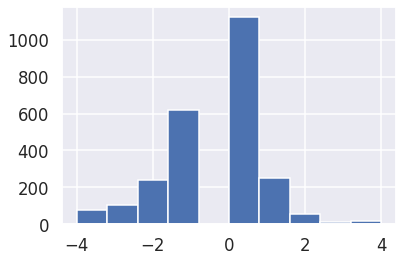

In [ ]:
residuals.hist()

In [ ]:
rel_res=residuals/test_class
rel_res=rel_res.abs()

error less than 5% - for 44% of the test data:

In [ ]:
len(rel_res[rel_res<0.05])/len(rel_res)

0.4488

bigger mistakes for about 47% of the test data:

In [ ]:
len(rel_res[rel_res>0.2])/len(rel_res)

0.4756

 Model Explainability Using SHAP
 As we can see the model with the highest accuracy is MLPClassifier.
 Let's explain the model with Shap

In [ ]:
# from sklearn import linear_model
# logreg = linear_model.LogisticRegression(max_iter=1000)
from sklearn import linear_model
logreg = linear_model.LogisticRegression(max_iter=3000)

In [ ]:
#separate labels from data
train_class = oh_train['reviews.rating']
oh_train_data = oh_train.drop('reviews.rating',axis=1) #features

In [ ]:
#train the model:
clf=logreg.fit(oh_train_data, train_class)


In [ ]:
test_class = oh_test['reviews.rating']
expected = test_class.values
oh_test_data= oh_test.drop('reviews.rating',axis=1)

In [ ]:
from sklearn import metrics
predicted = clf.predict(oh_test_data)
predicted_probs = clf.predict_proba(oh_test_data)

In [ ]:
# from imblearn.over_sampling import SMOTE

# sm = SMOTE()

# X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)

In [ ]:
shap_sample = oh_train_data.sample(500)

In [ ]:
!pip install shap
!pip install numpy --upgrade

import shap

In [ ]:
explainer = shap.Explainer(logreg.predict, shap_sample)
shap_values = explainer(shap_sample)

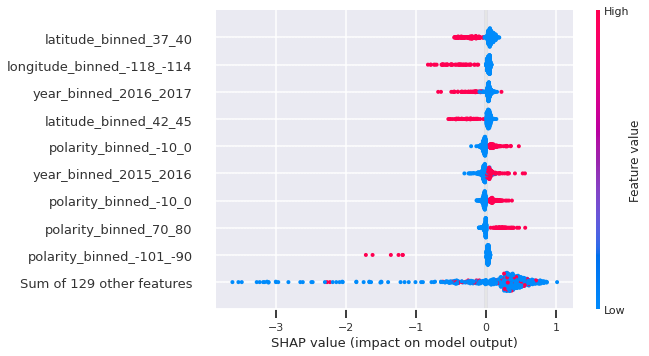

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
test_shap_values = explainer(oh_test_data)

In [ ]:
# from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# logreg
## residuals
residuals = test_class - predicted
max_error = max(predicted) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
# max_true, max_pred = test_class[max_idx], predicted[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))

Max Error: -4


In [ ]:
rel_res=residuals/test_class
rel_res=rel_res.abs()

In [ ]:
len(rel_res[rel_res<0.05])/len(rel_res)


0.458

In [ ]:
len(rel_res[rel_res>0.2])/len(rel_res)

0.4668

In [ ]:
rel_res[rel_res==rel_res.max()]

8925    4.0
5532    4.0
4842    4.0
9590    4.0
8091    4.0
       ... 
4829    4.0
3136    4.0
4551    4.0
5762    4.0
5653    4.0
Name: reviews.rating, Length: 72, dtype: float64

In [ ]:
predicted[236]

5

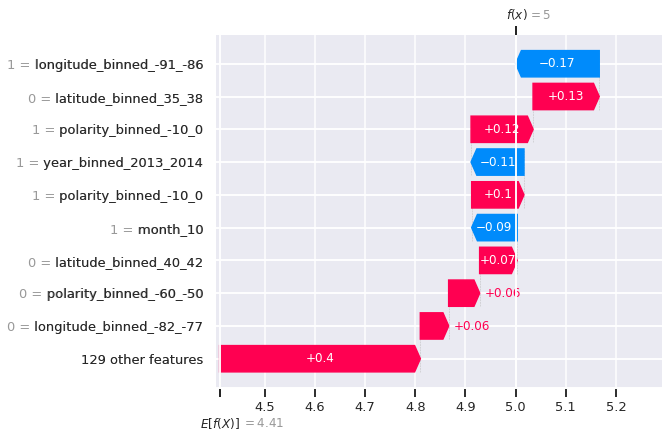

In [ ]:
shap.plots.waterfall(test_shap_values[236])